# I. Numpy

### Импортируйте NumPy

In [1]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [2]:
# df = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
# print(df)
# df = df.reshape(1, df.size)
# print(df)

df = np.zeros(10, dtype=int)
df[4] = 1
df = df.reshape(1, df.size)
df

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [3]:
df = np.arange(10, 50)
df = np.flip(df)
# df = [i for i in df if i % 2 == 0]
df = df[df % 2 == 0]
df

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [4]:
df = np.arange(0, 9).reshape(3, 3)
df

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [5]:
df = np.random.randint(10, size=(4, 3, 2))
f"max: {np.max(df)}, min: {np.min(df)}"

'max: 9, min: 0'

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [6]:
df1 = np.random.randint(10, size=(6, 4))
df2 = np.random.randint(10, size=(4, 3))
df3 = np.dot(df1, df2)
df3

array([[ 78,  52, 112],
       [ 60,  35,  72],
       [ 90,  83,  75],
       [ 93,  59,  91],
       [ 46,  62,  71],
       [127,  95, 117]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [7]:
df = np.random.randint(10, size=(7, 7))
df
res = (df - df.std()) / df.mean()
res

array([[ 1.35227558, -0.43767876, -0.43767876,  1.12853129,  1.35227558,
         0.6810427 ,  0.6810427 ],
       [-0.66142305,  0.90478699,  1.35227558,  0.23355412, -0.66142305,
        -0.21393447,  0.90478699],
       [-0.21393447,  0.6810427 ,  0.00980983, -0.43767876,  0.23355412,
         0.6810427 ,  0.6810427 ],
       [ 0.90478699, -0.66142305, -0.43767876, -0.66142305, -0.66142305,
        -0.43767876,  1.35227558],
       [ 0.90478699,  0.23355412,  0.90478699,  0.6810427 , -0.21393447,
         0.23355412,  0.23355412],
       [ 1.12853129,  0.00980983,  0.90478699, -0.43767876,  0.6810427 ,
         0.45729841,  1.35227558],
       [ 1.12853129,  0.00980983,  0.45729841,  0.6810427 , -0.66142305,
        -0.21393447,  0.90478699]])

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузите датасет Tips из набора датасетов seaborn

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

### Посмотрите на первые 5 строчек

In [10]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [11]:
df.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [12]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [13]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [14]:
#df.iloc[:, [0, 1, -1]]
df[["total_bill", "tip", "size"]]

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


### Найдите максимальное значение 'total_bill'

In [15]:
df["total_bill"].max()

50.81

### Найдите количество курящих людей

In [16]:
total_smoker = len(df[df["smoker"] == "Yes"])
total_smoker

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [62]:
daily_average = df.groupby("day")["total_bill"].mean()
daily_average

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [18]:
greater_than_median = df.loc[df["total_bill"] > df["total_bill"].median()]
mean_greater_than_median = greater_than_median.groupby("sex")["tip"].mean()

In [19]:
greater_than_median

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [20]:
mean_greater_than_median

sex
Female    3.663939
Male      3.756404
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [60]:
df.replace({"smoker": {"Yes": 1, "No": 0}})

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<Axes: xlabel='total_bill', ylabel='Count'>

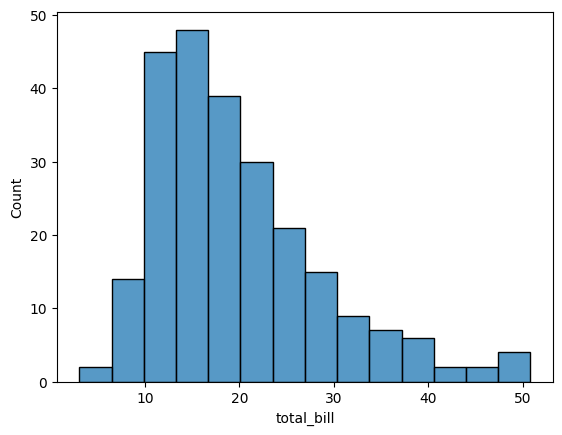

In [73]:
sns.histplot(df["total_bill"])

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<Axes: xlabel='total_bill', ylabel='tip'>

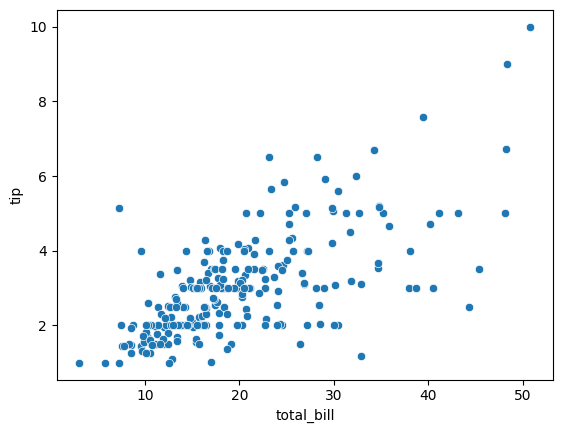

In [64]:
sns.scatterplot(data=df, x="total_bill", y="tip")

### Постройте pairplot

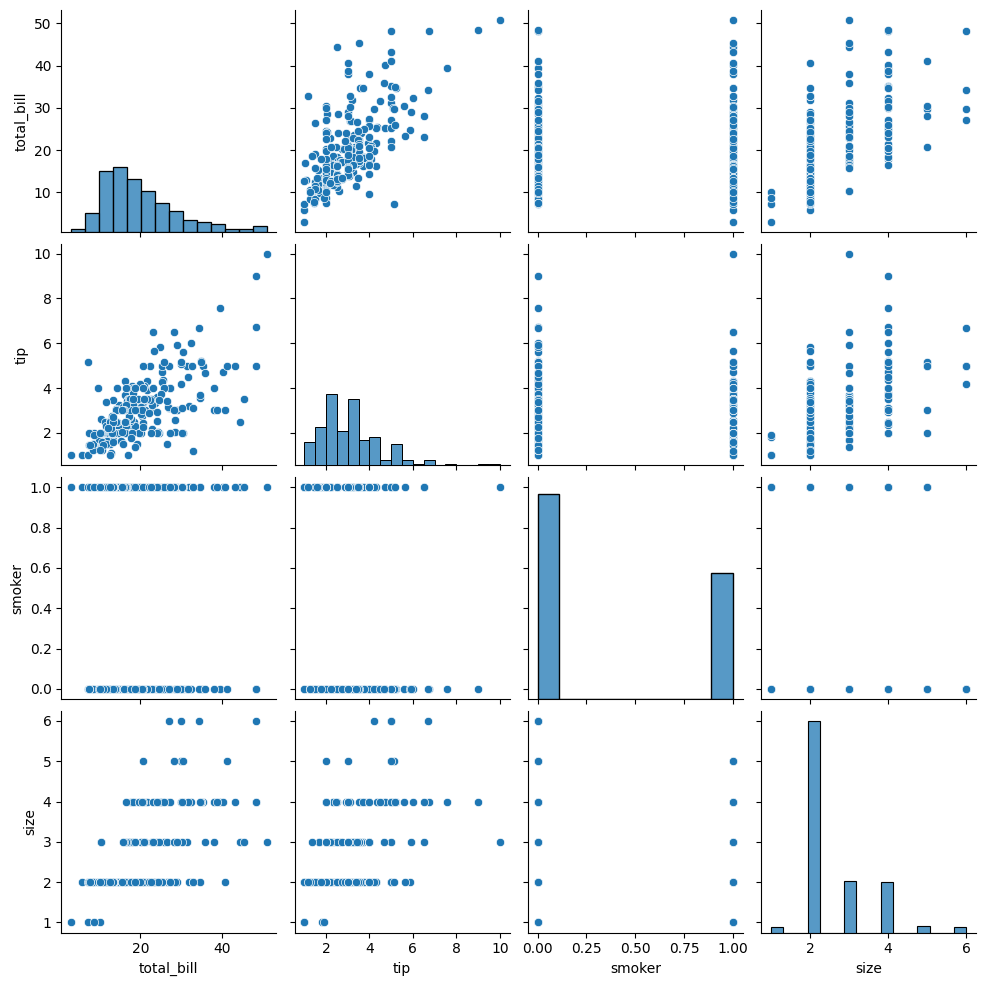

In [65]:
sns.pairplot(df)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

<Axes: xlabel='total_bill', ylabel='day'>

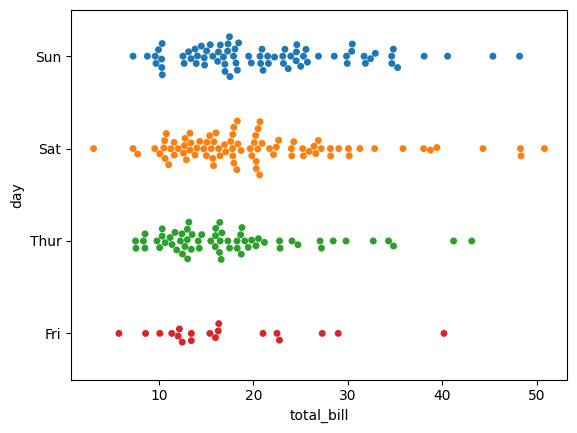

In [131]:
sns.swarmplot(data=df, x="total_bill", y="day", hue="day")

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

<Axes: xlabel='tip', ylabel='Count'>

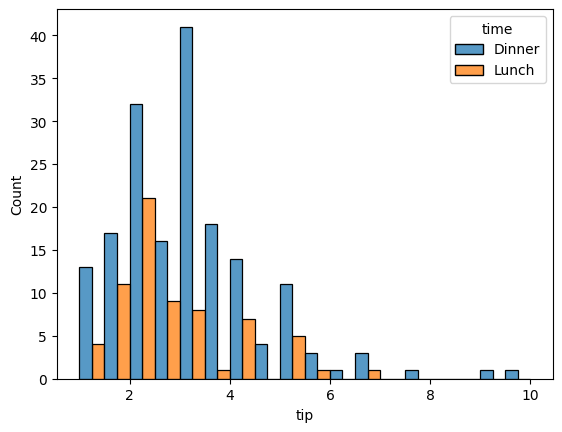

In [79]:
sns.histplot(data=df, x="tip", hue="time", multiple="dodge")

<Axes: xlabel='tip', ylabel='Count'>

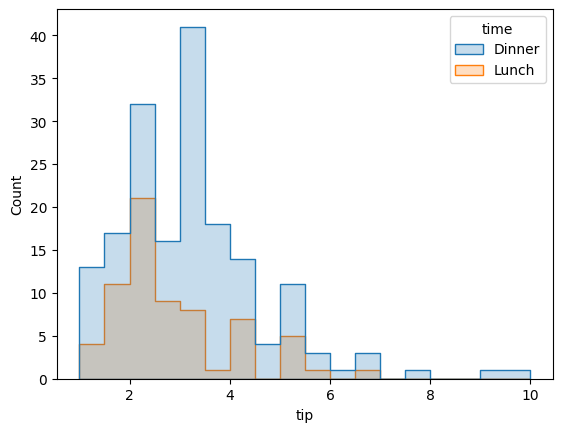

In [80]:
sns.histplot(data=df, x="tip", hue="time", element="step")

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

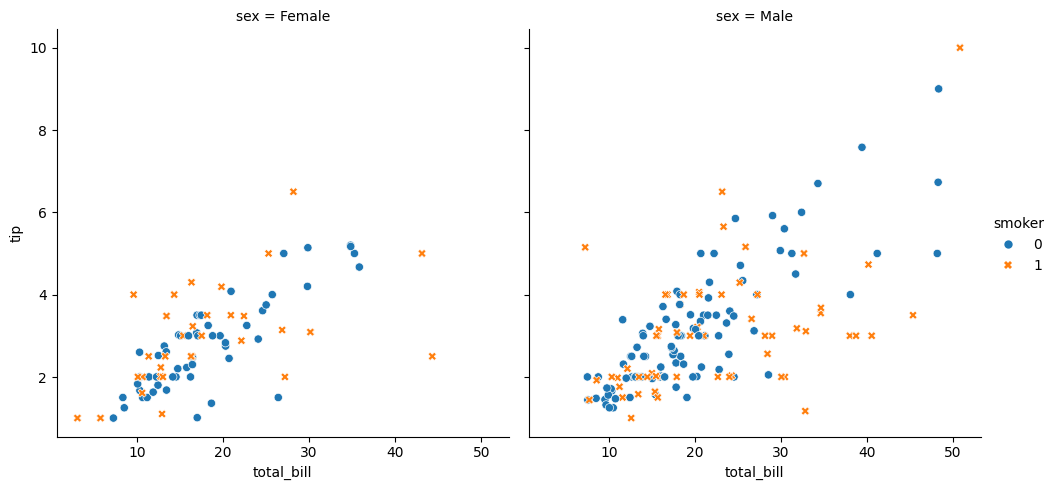

In [68]:
# по-моему так красивее:)
sns.relplot(
    data=df, x="total_bill", y="tip",
    col="sex", hue="smoker", style="smoker",
    kind="scatter"
)

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

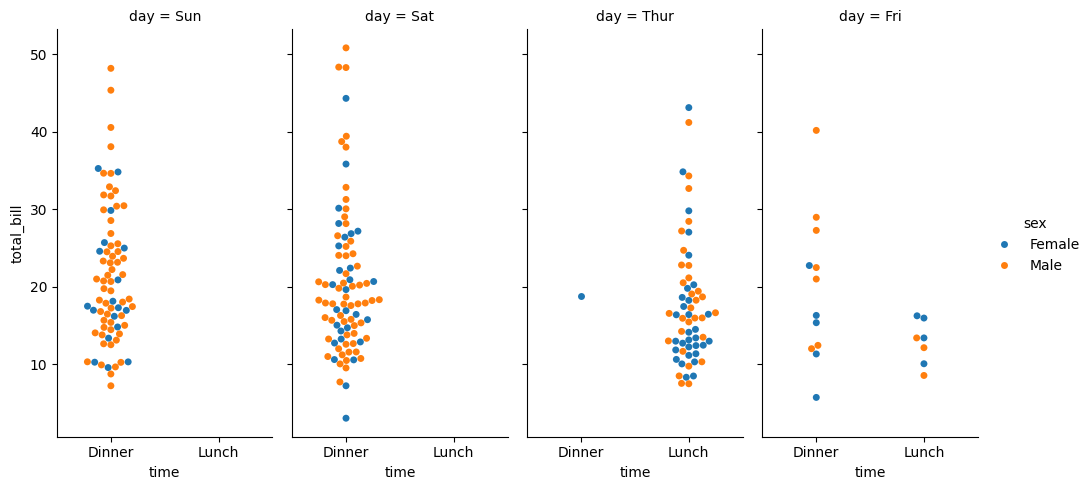

In [133]:
# доп график
sns.catplot(
    data=df, kind="swarm",
    x="time", y="total_bill", hue="sex", col="day",
    aspect=.5
)

### Входе работы было выявленно:
Максимальный счет (total_bill) - 55.81
Максимальный счет сделан был в субботу (Sat)
Максимальные чаевые сделанные мужчиной - 10
Максимальные чаевые сделанные женщиной - 6.5



In [147]:
df.groupby("sex")["tip"].max()

sex
Female     6.5
Male      10.0
Name: tip, dtype: float64